<a href="https://colab.research.google.com/github/alciopralcio/ML2024/blob/main/Zad1_Aleksander_Gynter_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, auc
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Załadowanie danych


In [ ]:
df = pd.read_csv('case1.csv', sep=';', error_bad_lines=False)


<ipython-input-3-da897c4bfe28>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('case1.csv', sep=';', error_bad_lines=False)


In [ ]:
for column in list(df):
  if not pd.api.types.is_numeric_dtype(df[column]):
    df.drop(column, axis=1, inplace=True)
    ## usuwanie kolumn nieodpowiedniego typu(nienumerycznego)

In [ ]:
df.head()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
0,0,1,0,844.26,1093.71,704785.63,721,89,0,40,...,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0
1,1,2,0,12709.07,2958.44,1218216.73,94,8,0,5,...,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0
2,2,3,0,246194.54,2434.02,516729.30,2,10,0,10,...,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0
3,3,4,0,10219.60,15785.09,397555.90,25,9,0,7,...,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0
4,4,5,0,36.61,10707.77,382472.42,4598,20,1,7,...,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0


In [ ]:
df.describe()

,Unnamed: 0,Index,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
count,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000
mean,4920.000000,1815.049893,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,...,1.252524e+08,4.346203e+06,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676
std,2840.996333,1222.621830,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,...,1.053741e+10,2.141192e+08,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,2460.000000,821.000000,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,4920.000000,1641.000000,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,7380.000000,2601.000000,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,...,9.900000e+01,2.946467e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000
max,9840.000000,4729.000000,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,...,1.000000e+12,1.724181e+10,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000


Kolumna FLAG oznacza oszustwo, zatem pokażemy na wykresie ile faktycznie ich było

In [ ]:
df["FLAG"].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

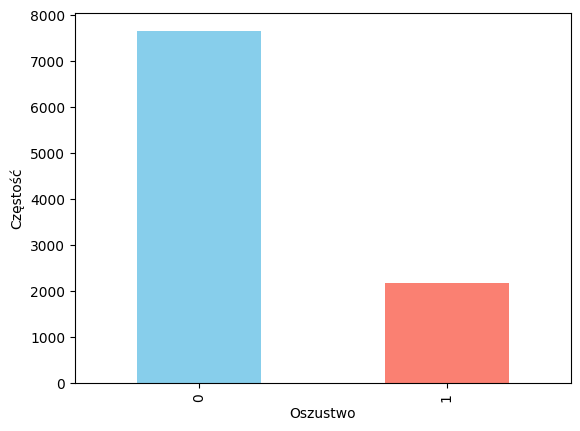

In [ ]:
df['FLAG'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel("Oszustwo")
plt.ylabel("Częstość");

## Weryfikacja danych pod kątem jakości

In [ ]:
df.isna().sum()  #Sprawdzenie gdzie są braki danych

Unnamed: 0                                                0
Index                                                     0
FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                            

In [ ]:
def show_missing_variables(df):
    missing_cols = df.columns[df.isnull().any()].tolist()
    if missing_cols:
        print("Brak wystąpiły w zmiennych:")
        print(", ".join(missing_cols))
    else:
        print("Dane bez błędów")

show_missing_variables(df.copy())

Brak wystąpiły w zmiennych:
Total ERC20 tnxs, ERC20 total Ether received, ERC20 total ether sent, ERC20 total Ether sent contract, ERC20 uniq sent addr, ERC20 uniq rec addr, ERC20 uniq sent addr.1, ERC20 uniq rec contract addr, ERC20 avg time between sent tnx, ERC20 avg time between rec tnx, ERC20 avg time between rec 2 tnx, ERC20 avg time between contract tnx, ERC20 min val rec, ERC20 max val rec, ERC20 avg val rec, ERC20 min val sent, ERC20 max val sent, ERC20 avg val sent, ERC20 min val sent contract, ERC20 max val sent contract, ERC20 avg val sent contract, ERC20 uniq sent token name, ERC20 uniq rec token name


In [ ]:
columns_to_impute = [
    'Total ERC20 tnxs',
    'ERC20 total Ether received',
    'ERC20 total ether sent',
    'ERC20 total Ether sent contract',
    'ERC20 uniq sent addr',
    'ERC20 uniq rec addr',
    'ERC20 uniq sent addr.1',
    'ERC20 uniq rec contract addr',
    'ERC20 avg time between sent tnx',
    'ERC20 avg time between rec tnx',
    'ERC20 avg time between rec 2 tnx',
    'ERC20 avg time between contract tnx',
    'ERC20 min val rec',
    'ERC20 max val rec',
    'ERC20 avg val rec',
    'ERC20 min val sent',
    'ERC20 max val sent',
    'ERC20 avg val sent',
    'ERC20 min val sent contract',
    'ERC20 max val sent contract',
    'ERC20 avg val sent contract',
    'ERC20 uniq sent token name',
    'ERC20 uniq rec token name'
]

for col in columns_to_impute:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)
## do uzupełniania brakujących wartości użyto mediany


In [ ]:
df.isna().sum()

Unnamed: 0                                              0
Index                                                   0
FLAG                                                    0
Avg min between sent tnx                                0
Avg min between received tnx                            0
Time Diff between first and last (Mins)                 0
Sent tnx                                                0
Received Tnx                                            0
Number of Created Contracts                             0
Unique Received From Addresses                          0
Unique Sent To Addresses                                0
min value received                                      0
max value received                                      0
avg val received                                        0
min val sent                                            0
max val sent                                            0
avg val sent                                            0
min value sent

## Podział danych na zbiory: treningowy i testowy

In [ ]:
X = df.drop(columns=['FLAG', 'Unnamed: 0', 'Index'])#usunięcie indeksów
y = df['FLAG']

podzial = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in podzial.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train.value_counts()

0    6129
1    1743
Name: FLAG, dtype: int64

In [ ]:
y_test.value_counts()

0    1533
1     436
Name: FLAG, dtype: int64

Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd


oversampler = RandomOverSampler(random_state=42)


X_oversamp, y_oversamp = oversampler.fit_resample(X_train, y_train)


df_oversamp = pd.concat([pd.DataFrame(y_oversamp, columns=['FLAG']), pd.DataFrame(X_oversamp, columns=X_train.columns)], axis=1)


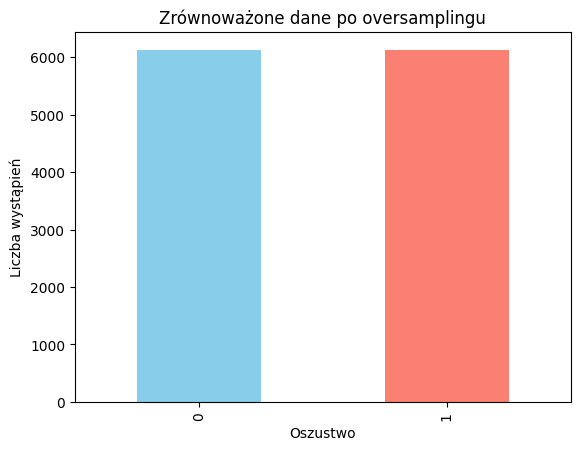

In [ ]:
import matplotlib.pyplot as plt

# Wykres słupkowy przedstawiający liczbę wystąpień poszczególnych klas
df_oversamp['FLAG'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])

plt.xlabel("Oszustwo")
plt.ylabel("Liczba wystąpień")

plt.title("Zrównoważone dane po oversamplingu")

plt.show()


In [ ]:
isolation_forest = IsolationForest(random_state=42)

kolumna_flag = 0
X_train_bez_flag = df_oversamp.drop(df_oversamp.columns[kolumna_flag], axis=1)

outlier_pred = isolation_forest.fit_predict(X_train_bez_flag)

X_train = df_oversamp[outlier_pred == 1]

## w tym momencie usunięte zostały outlliery

In [ ]:
X_train = df_oversamp.drop(columns='FLAG')
y_train = df_oversamp['FLAG']

## Standaryzacja danych

In [ ]:
std_scaler = StandardScaler()
standaryzacja = std_scaler.fit_transform(X_train)
standaryzacja_test = std_scaler.fit_transform(X_test)

In [ ]:
df_standaryzowane = pd.DataFrame(standaryzacja, columns=X.columns)
df_standaryzowane_test = pd.DataFrame(standaryzacja_test, columns=X.columns)

## Wybór 10 najistotniejszych zmiennych

In [ ]:
best_features = RFE(estimator=ExtraTreesClassifier(n_estimators=100), n_features_to_select=10)
best_features.fit(df_standaryzowane, y_train)
selected_features = X.columns[best_features.support_]

print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features : {list(selected_features)}")

Number of selected features: 10
Selected features : ['Avg min between received tnx', 'Time Diff between first and last (Mins)', 'Unique Received From Addresses', 'min value received', 'avg val received', 'avg val sent', 'Total ERC20 tnxs', 'ERC20 uniq rec addr', 'ERC20 uniq rec contract addr', 'ERC20 uniq rec token name']


In [ ]:
X_test_RFE = df_standaryzowane_test[[
    'Avg min between received tnx',
    'Time Diff between first and last (Mins)',
    'Received Tnx',
    'Unique Received From Addresses',
    'Total ERC20 tnxs',
    'ERC20 total Ether sent contract',
    'ERC20 uniq rec addr',
    'ERC20 uniq rec contract addr',
    'ERC20 avg val sent',
    'ERC20 uniq rec token name'
]]

X_train_RFE = df_standaryzowane[[
    'Avg min between received tnx',
    'Time Diff between first and last (Mins)',
    'Received Tnx',
    'Unique Received From Addresses',
    'Total ERC20 tnxs',
    'ERC20 total Ether sent contract',
    'ERC20 uniq rec addr',
    'ERC20 uniq rec contract addr',
    'ERC20 avg val sent',
    'ERC20 uniq rec token name'
]]

# Prognoza KNN dla 3 wartośći hiperparametrów


In [ ]:
k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_standaryzowane, y_train)
    y_pred = knn.predict(df_standaryzowane_test)

    accuracy = accuracy_score(y_test, y_pred)
    k_scores.append(accuracy)

best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

Best k value: 2
Best accuracy: 0.7872


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1533
           1       0.52      0.32      0.40       436

    accuracy                           0.78      1969
   macro avg       0.67      0.62      0.63      1969
weighted avg       0.76      0.78      0.76      1969



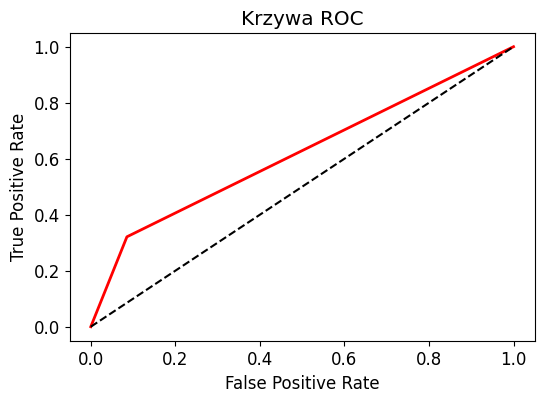

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()


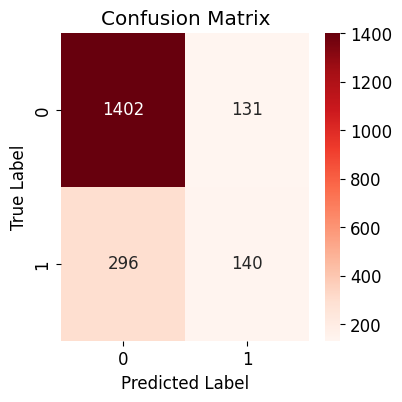

In [82]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

To samo robimy dla 10 najwazniejszych zmiennych

In [ ]:
k_range = range(1, 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_RFE, y_train)
    y_pred_2 = knn.predict(X_test_RFE)

    accuracy = accuracy_score(y_test, y_pred_2)
    k_scores.append(accuracy)

best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

Best k value: 2
Best accuracy: 0.7836


In [ ]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1533
           1       0.46      0.20      0.28       436

    accuracy                           0.77      1969
   macro avg       0.63      0.57      0.57      1969
weighted avg       0.73      0.77      0.73      1969



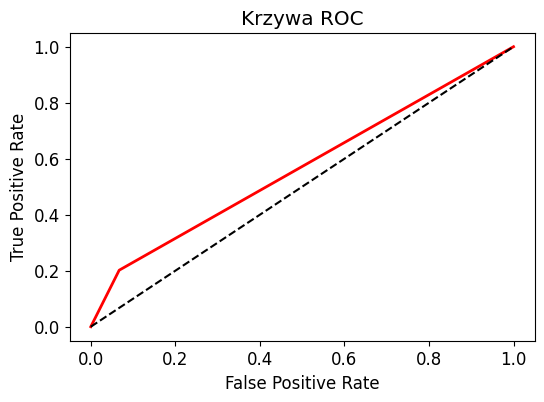

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_2)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

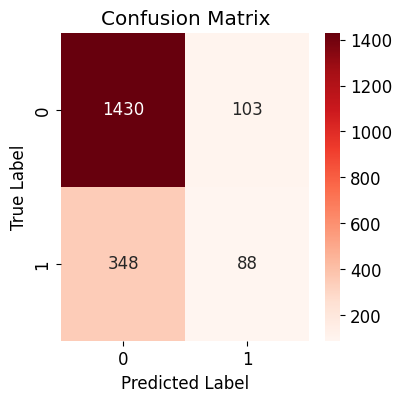

In [84]:
cm = confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Best k value: 2
Best accuracy: 0.7872
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1533
           1       0.53      0.25      0.34       436

    accuracy                           0.78      1969
   macro avg       0.67      0.59      0.60      1969
weighted avg       0.75      0.78      0.75      1969



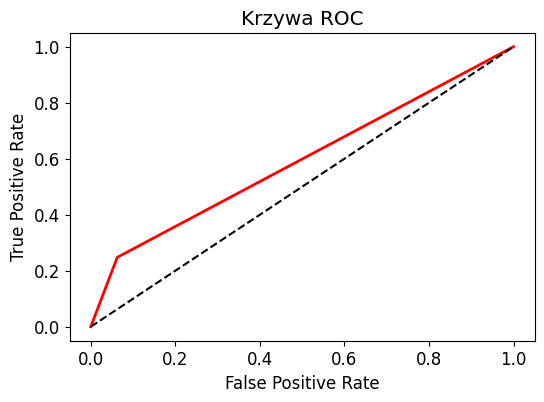

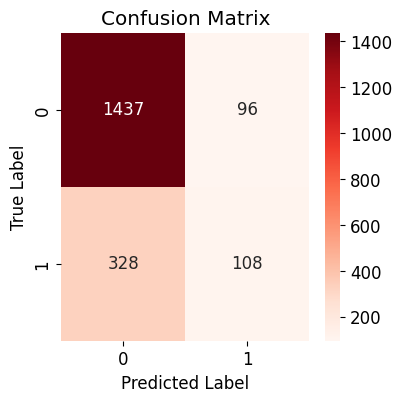

In [85]:
k_range = range(1, 5)
#Robimy to samo, ale dla mniejszej rozpiętości sąsiadów (5 zamiast 10)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_standaryzowane, y_train)
    y_pred_3 = knn.predict(df_standaryzowane_test)

    accuracy = accuracy_score(y_test, y_pred_3)
    k_scores.append(accuracy)

best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

print(classification_report(y_test, y_pred_3))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_3)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

cm = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best k value: 2
Best accuracy: 0.7836
              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1533
           1       0.46      0.17      0.25       436

    accuracy                           0.77      1969
   macro avg       0.63      0.56      0.56      1969
weighted avg       0.73      0.77      0.73      1969



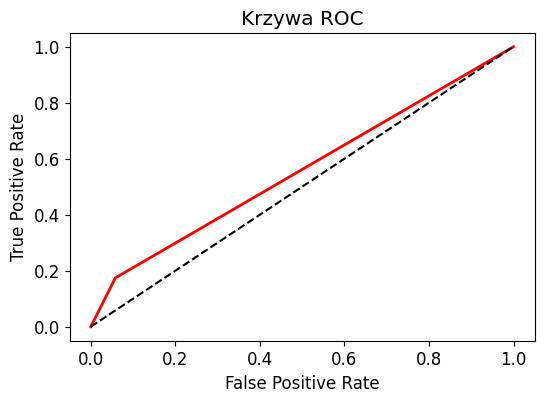

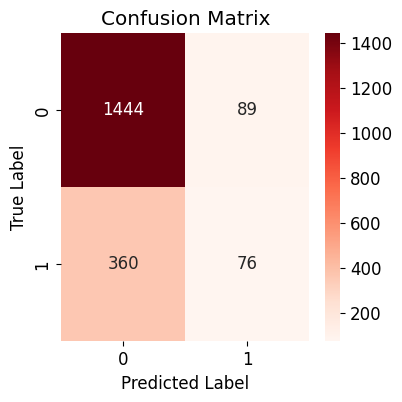

In [86]:
#10 wyselekcjonowanych
k_range = range(1, 5)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_RFE, y_train)
    y_pred_4 = knn.predict(X_test_RFE)

    accuracy = accuracy_score(y_test, y_pred_4)
    k_scores.append(accuracy)

best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

print(classification_report(y_test, y_pred_4))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_4)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

cm = confusion_matrix(y_test, y_pred_4)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Best k value: 12
Best accuracy: 0.7943
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1533
           1       0.53      0.34      0.41       436

    accuracy                           0.79      1969
   macro avg       0.68      0.63      0.64      1969
weighted avg       0.76      0.79      0.77      1969



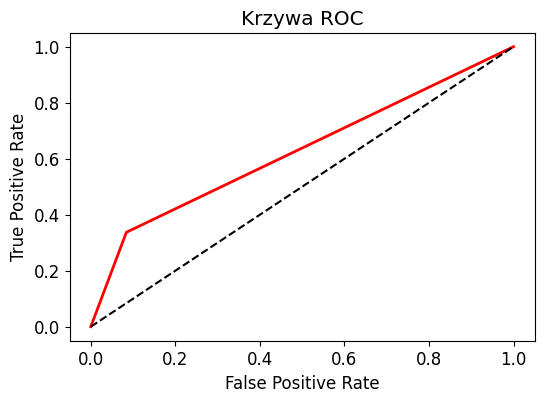

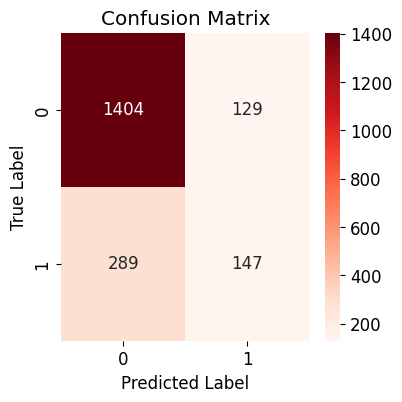

In [87]:
k_range = range(1, 20)
#Tym razem parametr k będzie mógł osiągnąć maksymalnie 20
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_standaryzowane, y_train)
    y_pred_5 = knn.predict(df_standaryzowane_test)

    accuracy = accuracy_score(y_test, y_pred_5)
    k_scores.append(accuracy)

best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

print(classification_report(y_test, y_pred_5))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_5)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

cm = confusion_matrix(y_test, y_pred_5)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Best k value: 2
Best accuracy: 0.7836
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1533
           1       0.44      0.22      0.29       436

    accuracy                           0.76      1969
   macro avg       0.62      0.57      0.57      1969
weighted avg       0.72      0.76      0.73      1969



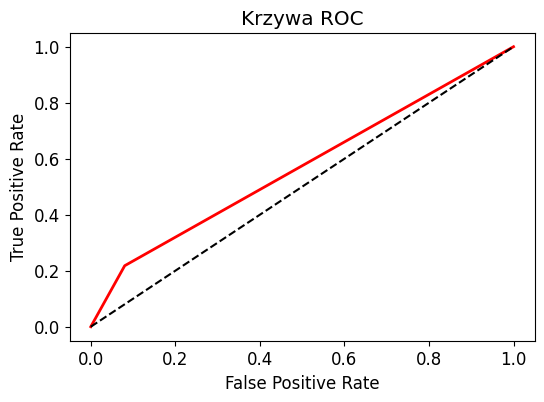

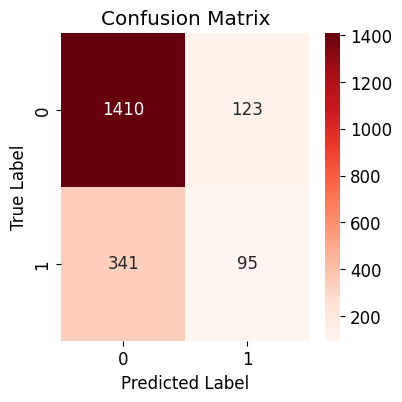

In [88]:
#10 wyselekcjonowanych
k_range = range(1, 20)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_RFE, y_train)
    y_pred_6 = knn.predict(X_test_RFE)

    accuracy = accuracy_score(y_test, y_pred_6)
    k_scores.append(accuracy)

best_k = k_range[np.argmax(k_scores)]
best_accuracy = max(k_scores)

print(f"Best k value: {best_k}")
print(f"Best accuracy: {best_accuracy:.4f}")

print(classification_report(y_test, y_pred_6))

fpr, tpr, thresholds = roc_curve(y_test, y_pred_6)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2, color='red')

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('Krzywa ROC')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()

cm = confusion_matrix(y_test, y_pred_6)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Jak widać, dla wielkości dwóch pierwwszych iteracji (zmian) parametru k, różnicy brak, jednak po zwiększeniu rozpiętości parametru k do 20, różnica występuje

## Wyniki

In [89]:
accuracy_1 = (accuracy_score(y_test, y_pred))
accuracy_2 = (accuracy_score(y_test, y_pred_2))
accuracy_3 = (accuracy_score(y_test, y_pred_3))
accuracy_4 = (accuracy_score(y_test, y_pred_4))
accuracy_5 = (accuracy_score(y_test, y_pred_5))
accuracy_5 = (accuracy_score(y_test, y_pred_6))
accuracy_6 = (accuracy_score(y_test, y_pred_6))

models = ["Metoda K-najbliższych sąsiadów", "Metoda K-najbliższych sąsiadów - 10 najistotniejszych",
          "Metoda K-najbliższych sąsiadów - zmniejszona wartość k do 5", "Metoda K-najbliższych sąsiadów - zmniejszona wartość k do 5 - 10 najistotniejszych",
         "Metoda K-najbliższych sąsiadów - k 1:20", "Metoda K-najbliższych sąsiadów - k 1:20 - 10 najistotniejszych"]
accuracy_values = [accuracy_1, accuracy_2, accuracy_3, accuracy_4, accuracy_5, accuracy_6]
accuracy_dict = {"Model": models, "Accuracy": accuracy_values}

df_accuracy = pd.DataFrame(accuracy_dict)

print(df_accuracy.to_string(index=False))


                                                                             Model  Accuracy
                                                    Metoda K-najbliższych sąsiadów  0.783139
                             Metoda K-najbliższych sąsiadów - 10 najistotniejszych  0.770950
                       Metoda K-najbliższych sąsiadów - zmniejszona wartość k do 5  0.784662
Metoda K-najbliższych sąsiadów - zmniejszona wartość k do 5 - 10 najistotniejszych  0.771965
                                           Metoda K-najbliższych sąsiadów - k 1:20  0.764347
                    Metoda K-najbliższych sąsiadów - k 1:20 - 10 najistotniejszych  0.764347


## Najefektywniejszy okazał się model  KNN gdzie "k"było ustawione w zakresie od 1 do 5 - tutaj dokładność jest najwyższa